In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Линейная регрессия  


In [2]:
n = 100
X = 2 * np.random.randn(n, 1)
y = 4 + 3 * X + np.random.randn(n, 1)
X_b = np.c_[np.ones((n, 1)), X] # член смещения

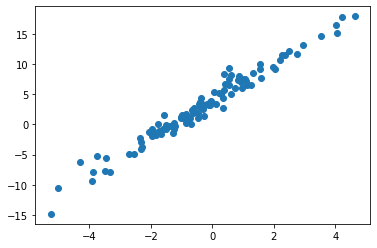

In [3]:
plt.scatter(X, y)

In [4]:
from sklearn.linear_model import LinearRegression # готовая реализация линейной регрессии (дальше своя реализация)

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.10553064]), array([[3.07919635]]))

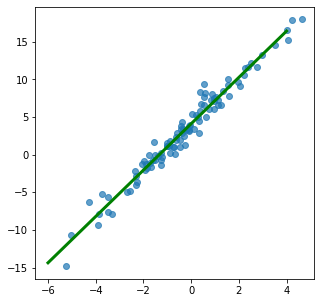

In [6]:
X_new = np.linspace(-6, 4, n).reshape(n, 1)
X_new_ones = np.c_[np.ones((100, 1)), X_new]
y_new_pred = lin_reg.predict(X_new)
plt.figure(figsize=(5, 5))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_new_pred, 'g', linewidth=3)


# Градиентный Спуск  
Итеративный способ подгонки весов

In [7]:
epochs = 1000 # количество эпох обучения
theta = np.random.randn(2, 1) # Изначально параметры модели - рандомные значения
eta = 0.01 # шаг обучения
for epoch in range(epochs):
    glob_error = 0
    grad = np.ones((2, 1))
    for i in range(n): # можно реализовать векторно, без цикла(данная реализация - просто пример)
        y_pred  = X_b[i].dot(theta) # предсказанное значение - есть взвешенная сумма
        e = (y_pred - y[i]) ** 2 / 2 # ошибка: расстояние от точки до прямой.
        glob_error += e # сумма ошибок по всем элементам множества
        grad += (y_pred - y[i]) * X_b[i].reshape(-1, 1) # считаем градиент по параметрам theta, относительно каждого элемента
    theta -= eta * grad / n # делаем непосредственно изменение параметров
    print(glob_error / 100) # отображаем среднюю ошибку
print(theta) # оптимальные параметры

[10.64690445]
[10.24061209]
[9.85873788]
[9.49952079]
[9.16133407]
[8.8426749]
[8.5421548]
[8.25849075]
[7.99049708]
[7.73707792]
[7.49722027]
[7.26998758]
[7.0545139]
[6.84999836]
[6.65570021]
[6.47093417]
[6.29506615]
[6.12750929]
[5.96772038]
[5.81519645]
[5.66947171]
[5.53011468]
[5.39672557]
[5.26893384]
[5.14639598]
[5.02879341]
[4.91583061]
[4.80723332]
[4.70274698]
[4.60213515]
[4.50517822]
[4.41167204]
[4.32142684]
[4.23426606]
[4.15002541]
[4.0685519]
[3.98970305]
[3.91334602]
[3.83935696]
[3.76762028]
[3.69802808]
[3.63047955]
[3.56488044]
[3.5011426]
[3.43918351]
[3.37892587]
[3.32029722]
[3.26322957]
[3.20765909]
[3.15352584]
[3.1007734]
[3.04934872]
[2.9992018]
[2.95028552]
[2.90255542]
[2.85596949]
[2.81048805]
[2.76607354]
[2.72269039]
[2.6803049]
[2.63888507]
[2.59840054]
[2.55882244]
[2.52012329]
[2.48227694]
[2.44525844]
[2.40904401]
[2.37361091]
[2.33893742]
[2.30500277]
[2.27178704]
[2.23927116]
[2.20743683]
[2.17626647]
[2.14574319]
[2.11585076]
[2.08657353]
[2.05

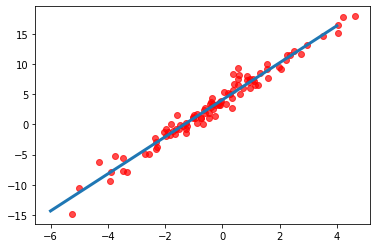

In [8]:
y_pred_gd = X_new_ones.dot(theta) 
plt.scatter(X, y, color='r', alpha=0.7)
plt.plot(X_new, y_pred_gd, linewidth=3)

# Стохастический градиентный спуск  
Отличается тем, что для вычислений берутся рандомные элементы множества

In [9]:
epochs = 1000
theta = np.random.randn(2, 1)
eta = 0.01
for epoch in range(epochs):
    glob_error = 0
    for _ in range(n):
        rnd_idx = np.random.randint(0, n) # рандомный индекс для вычисления градиента
        y_pred  = X_b[rnd_idx].dot(theta)
        e = (y_pred - y[rnd_idx]) ** 2 / 2
        glob_error += e
        grad = (y_pred - y[rnd_idx]) * X_b[rnd_idx].reshape(-1, 1)
        theta -= eta * grad # шаг по изменению параметров делается сразу
    print(glob_error / 100)
print(theta)

[7.78714902]
[0.99852152]
[0.64944426]
[0.71517271]
[0.7416286]
[0.75709271]
[0.55885436]
[0.60595489]
[0.67549034]
[0.65876]
[0.60921792]
[0.79144849]
[0.51162761]
[0.6317388]
[0.77132498]
[0.56587723]
[0.64884694]
[0.72382735]
[0.71724107]
[0.51423896]
[0.51772566]
[0.44696246]
[0.52892335]
[0.58531229]
[0.65723809]
[0.70837309]
[0.52821434]
[0.7510594]
[0.69643725]
[0.42251757]
[0.87246894]
[0.56344315]
[0.47644343]
[0.53198404]
[0.51699898]
[0.91710893]
[0.4973634]
[0.66376795]
[0.83283165]
[0.54403603]
[0.47649446]
[0.77686479]
[0.55553406]
[0.82682134]
[0.70579428]
[0.50946553]
[0.56315016]
[0.90309876]
[0.52247403]
[0.76236435]
[0.63769758]
[0.70167209]
[0.39939315]
[0.53791209]
[0.70550903]
[0.46565295]
[0.75180997]
[0.57482425]
[0.5679765]
[0.62457768]
[0.67432928]
[0.64533889]
[0.85535323]
[0.84578177]
[0.59975345]
[0.66613426]
[0.58620909]
[0.43890076]
[0.78444916]
[0.61841218]
[0.55476248]
[0.60055739]
[0.83269149]
[0.48174643]
[0.74826673]
[0.64623582]
[0.75893295]
[0.4635

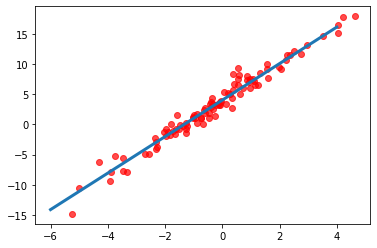

In [10]:
y_pred_gd = X_new_ones.dot(theta)
plt.scatter(X, y, color='r', alpha=0.7)
plt.plot(X_new, y_pred_gd, linewidth=3)

# Полиноминальная регрессия

In [11]:
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1) # Квадратичная функция

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # разделяем обуч. множество

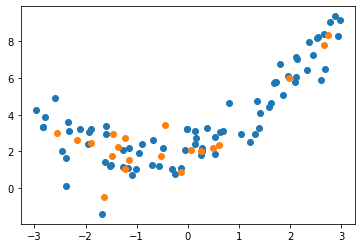

In [14]:
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)

In [15]:
from sklearn.preprocessing import PolynomialFeatures # добавление степеней x, для корректного предсказания модели

In [16]:
poly_features = PolynomialFeatures().fit(X_train)
X_poly = poly_features.transform(X_train)
X_poly[:5]

array([[ 1.        , -1.26323938,  1.59577372],
       [ 1.        , -1.6876233 ,  2.84807241],
       [ 1.        ,  2.13539987,  4.55993261],
       [ 1.        , -2.34433202,  5.49589263],
       [ 1.        , -0.69116252,  0.47770563]])

In [17]:
# Оптимизация методом Градиентного спуска
epochs = 1000
theta = np.random.rand(3, 1)
m = X_train.shape[0]
for epoch in range(epochs):
    glob_error = 0
    grad = np.ones((3, 1))
    for i in range(m):
        y_pred = X_poly[i].dot(theta)
        e = (y_pred - y_train[i]) ** 2 / 2
        glob_error += e
        grad += (y_pred - y_train[i]) * X_poly[i:i + 1].T
    theta -= eta * grad / m
    print("MSE: {}".format(glob_error / m))
print(theta)

MSE: [0.86349822]
MSE: [0.84646201]
MSE: [0.8338849]
MSE: [0.82433174]
MSE: [0.81683216]
MSE: [0.81073004]
MSE: [0.80558181]
MSE: [0.80108763]
MSE: [0.79704477]
MSE: [0.7933162]
MSE: [0.78980924]
MSE: [0.78646124]
MSE: [0.78322977]
MSE: [0.78008611]
MSE: [0.77701078]
MSE: [0.77399051]
MSE: [0.77101626]
MSE: [0.76808182]
MSE: [0.7651829]
MSE: [0.76231649]
MSE: [0.75948048]
MSE: [0.7566733]
MSE: [0.75389381]
MSE: [0.75114114]
MSE: [0.74841458]
MSE: [0.74571357]
MSE: [0.74303761]
MSE: [0.74038627]
MSE: [0.73775918]
MSE: [0.73515597]
MSE: [0.7325763]
MSE: [0.73001986]
MSE: [0.72748635]
MSE: [0.72497548]
MSE: [0.72248695]
MSE: [0.7200205]
MSE: [0.71757587]
MSE: [0.71515278]
MSE: [0.71275098]
MSE: [0.71037024]
MSE: [0.7080103]
MSE: [0.70567093]
MSE: [0.7033519]
MSE: [0.70105299]
MSE: [0.69877398]
MSE: [0.69651464]
MSE: [0.69427478]
MSE: [0.69205417]
MSE: [0.68985263]
MSE: [0.68766995]
MSE: [0.68550593]
MSE: [0.68336039]
MSE: [0.68123314]
MSE: [0.679124]
MSE: [0.67703279]
MSE: [0.67495932]
MS

# Гребневая регрессия  
J(θ) = Error(θ) + alpha / 2 * ∑θ^2

In [18]:
np.random.seed(42)
n = 100
X = 3 * np.random.rand(n, 1)
X_b = np.c_[np.ones((n, 1)), X]
y = 1 + 0.5 * X + np.random.randn(n, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(n, 1)
X_new_b = np.c_[np.ones((n, 1)), X_new]

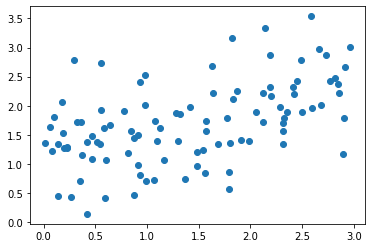

In [19]:
plt.scatter(X, y)

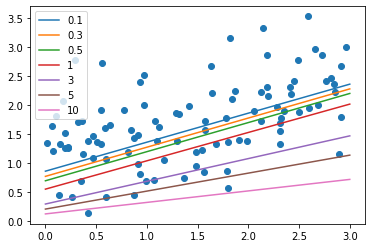

In [20]:
alphas = [0.1, 0.3, 0.5, 1, 3, 5, 10] # Коэфиценты регуляризации
for alpha in alphas:
    epochs = 1000
    eta = 0.001
    np.random.seed(42)
    theta = np.random.randn(2, 1)
    for epoch in range(epochs): # Оптимизация градиентным спуском
        glob_error = 0
        grad = 0
        for i in range(n):
            y_pred = X_b[i].dot(theta)
            e = (y_pred - y[i]) ** 2 / 2 + alpha * np.sum(theta ** 2) / 2 # к ошибке добавляется член регуляризации: коэф * сумму кадратов весов
            glob_error += e
            grad += (y_pred - y[i]) * X_b[i].reshape((-1, 1)) + alpha * theta 
        theta -= eta * grad / n
    plt.plot(X_new, X_new_b.dot(theta), label=f"{alpha}")
plt.scatter(X, y)
plt.legend()
plt.show()

# Лассо регрессия  
J(θ) = Error(θ) + alpha * ∑|θ|

[[0.76408387]
 [0.55571619]]
[[0.70916397]
 [0.54926029]]
[[0.58959006]
 [0.53314086]]
[[0.47278735]
 [0.51505711]]
[[0.18860959]
 [0.46418342]]


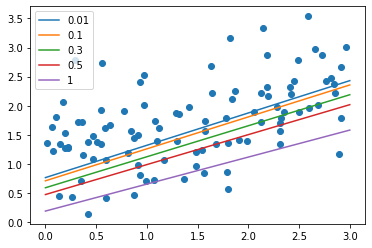

In [21]:
alphas = [0.01, 0.1, 0.3, 0.5, 1]
for alpha in alphas:
    np.random.seed(42)
    epochs = 1000
    eta = 0.001
    theta = -0.5 + np.random.randn(2, 1)
    for epoch in range(epochs):
        glob_error = 0
        grad = 0
        for i in range(n):
            y_pred = X_b[i].dot(theta)
            e = (y_pred - y[i]) ** 2 / 2 + alpha * np.sum(np.abs(theta))
            glob_error += e
            grad += (y_pred - y[i]) * X_b[i].reshape((-1, 1)) + alpha * np.sign(theta)
        theta -= eta * grad / n
    print(theta)
    plt.plot(X_new, X_new_b.dot(theta), label=f"{alpha}")
plt.scatter(X, y)
plt.legend()
plt.show()

# Раннее прекращение

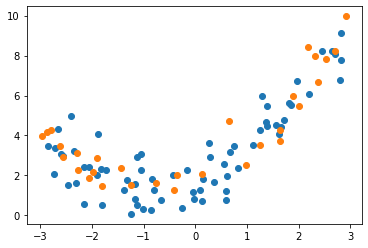

In [22]:
np.random.seed(42)
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(n, 1)
poly_feat = PolynomialFeatures().fit(X)
X_new = poly_feat.transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.3, random_state=42) # разбиение генеральной совокупности на train и val
plt.scatter(X_train[:, 1], y_train)
plt.scatter(X_val[:, 1], y_val)

In [23]:
epochs = 10000
eta = 0.1
m_t = X_train.shape[0] 
m_v = X_val.shape[0]
min_val_error = float('inf') # Флаг для условия
best_epoch = 0 # Сохраним эпоху с минимальной валидационной ошибкой
theta = np.random.randn(3, 1) # рандомные веса
best_weights = np.zeros((3, 1)) # сохраним лучшие веса, дающие минимальную ошибку на валидационном мн-ве
for epoch in range(epochs): # градиентный спуск
    y_pred_train = X_train.dot(theta) # предсказание на train
    mse_train = np.sum((y_pred_train - y_train) ** 2) / 2 / m_t # mean squared error на обучающем мн-ве
    y_pred_val = X_val.dot(theta) # предсказание на валидационном мн-ве
    mse_val = np.sum((y_pred_val - y_val) ** 2) / 2 / m_v # mean squared error на валидационном мн-ве
    grad = X_train.T.dot(y_pred_train - y_train) / m_t # градиент
    theta -= eta * grad # шаг изменения весов
    #print(epoch, "\tMSE TRAIN: {} ####### MSE VAL: {}".format(mse_train, mse_val))
    if mse_val < min_val_error: # Если полученная ошибка на валидационном мн-ве меньше текущей 
        min_val_epoch = mse_val # перезапишем границу
        best_epoch = epoch # сохраним лучшую эпоху
        best_weights = theta # сохраним лучшие веса

print("BEST_EPOCH: {}".format(best_epoch))
print("MIN_VAL_EPOCH: {}".format(min_val_epoch))
print("BEST_WEIGHTS: {}".format(best_weights))

BEST_EPOCH: 9999
MIN_VAL_EPOCH: 0.28135294803202765
BEST_WEIGHTS: [[1.7591572 ]
 [0.929247  ]
 [0.54509661]]


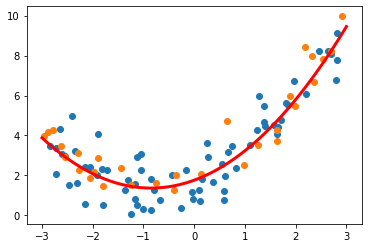

In [24]:
X_test = np.linspace(-3, 3, 100).reshape((-1, 1))
X_test_poly = poly_feat.transform(X_test)
y_test_pred = X_test_poly.dot(theta)
plt.scatter(X_train[:, [1]], y_train)
plt.scatter(X_val[:, [1]], y_val)
plt.plot(X_test_poly[:, [1]], y_test_pred, 'r', linewidth=3)

# Логистическая регрессия задача об ИРИСАХ  
Оценивает вероятность принадлежности объекта к классу  
Оценка происходит путём подсчёта взвешенной суммы входных данных, но ответ даётся не напрямую, а относительно логистического результата:  
p = σ(XᵀΘ)  
p - вероятность  
σ(.) - представляет собой сигмоидальную функцию (0, 1)

In [25]:
from sklearn import datasets

In [26]:
iris = datasets.load_iris() # Загрузим данные по ирисам
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
X = iris.data[:, 3:] # для начала загрузим только 1 признак
y = (iris.target == 2).astype(np.int8).reshape((-1, 1))
X.shape, y.shape

((150, 1), (150, 1))

In [28]:
X_b = np.c_[np.ones((150, 1)), X]

In [29]:
def logit(t): # функция сигмойда, конвертирующая взвешенную сумму в вероятность
    return 1 / (1 + np.exp(-t))

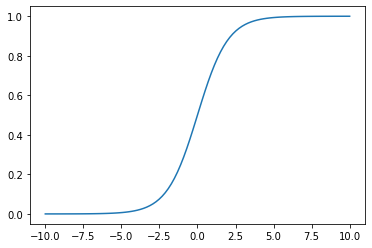

In [30]:
# Пример сигмоидальной функции
plt.plot(np.linspace(-10, 10, 100), logit(np.linspace(-10, 10, 100)))

In [31]:
epochs = 3000
eta  = 0.01
theta = np.random.randn(2, 1)
for epoch in range(epochs):
    p = logit(X_b.dot(theta)) # считаем вероятности
    y_pred = (p >= 0.5).astype(np.int8) # вырабатываем прогноз относительно вероятности
    #ERROR - logloss
    print(f"{epoch}: ACCURACY - {np.sum(y_pred == y)/ 150 * 100}% ### ERROR - {np.sum(-y * np.log(p) - (1 - y) * np.log(1 - p)) / 150}")
    grad = X_b.T.dot(p - y) / 150
    theta -= eta * grad

0: ACCURACY - 33.33333333333333% ### ERROR - 2.175362168523086
1: ACCURACY - 33.33333333333333% ### ERROR - 2.1689001042944382
2: ACCURACY - 33.33333333333333% ### ERROR - 2.1624461943116597
3: ACCURACY - 33.33333333333333% ### ERROR - 2.156000528883925
4: ACCURACY - 33.33333333333333% ### ERROR - 2.1495631991465833
5: ACCURACY - 33.33333333333333% ### ERROR - 2.1431342970624563
6: ACCURACY - 33.33333333333333% ### ERROR - 2.1367139154229275
7: ACCURACY - 33.33333333333333% ### ERROR - 2.130302147848804
8: ACCURACY - 33.33333333333333% ### ERROR - 2.123899088790958
9: ACCURACY - 33.33333333333333% ### ERROR - 2.117504833530721
10: ACCURACY - 33.33333333333333% ### ERROR - 2.111119478180056
11: ACCURACY - 33.33333333333333% ### ERROR - 2.104743119681457
12: ACCURACY - 33.33333333333333% ### ERROR - 2.098375855807609
13: ACCURACY - 33.33333333333333% ### ERROR - 2.092017785160772
14: ACCURACY - 33.33333333333333% ### ERROR - 2.085669007171901
15: ACCURACY - 33.33333333333333% ### ERROR -

In [32]:
X = iris.data[:, 2:] # теперь относительно 2 признаков
y = (iris.target == 2).astype(np.int8).reshape((-1, 1))
X.shape, y.shape

((150, 2), (150, 1))

In [33]:
X_b = np.c_[np.ones((150, 1)), X]

In [34]:
epochs = 3000
eta = 0.01
theta = np.random.randn(3, 1)
for epoch in range(epochs):
    p = logit(X_b.dot(theta))
    y_pred = (p >= 0.5).astype(np.int8)
    print(f"{epoch}: ACCURACY - {np.sum(y_pred == y)/ 150 * 100}% ### ERROR - {np.sum(-y * np.log(p) - (1 - y) * np.log(1 - p)) / 150}")
    grad = X_b.T.dot(p - y)
    theta -= eta * grad

0: ACCURACY - 66.66666666666666% ### ERROR - 1.9780974107184492
1: ACCURACY - 33.33333333333333% ### ERROR - 3.6075207092500174
2: ACCURACY - 66.66666666666666% ### ERROR - 2.188320988053311
3: ACCURACY - 33.33333333333333% ### ERROR - 3.2949732830071143
4: ACCURACY - 66.66666666666666% ### ERROR - 2.2298115733648625
5: ACCURACY - 33.33333333333333% ### ERROR - 3.1206740596508045
6: ACCURACY - 66.66666666666666% ### ERROR - 2.1485142891709197
7: ACCURACY - 33.33333333333333% ### ERROR - 3.062709246086119
8: ACCURACY - 66.66666666666666% ### ERROR - 1.9740491992009022
9: ACCURACY - 34.66666666666667% ### ERROR - 3.092345743195446
10: ACCURACY - 66.66666666666666% ### ERROR - 1.7371244575624216
11: ACCURACY - 34.66666666666667% ### ERROR - 3.1715184776519347
12: ACCURACY - 66.66666666666666% ### ERROR - 1.4707638726866343
13: ACCURACY - 37.333333333333336% ### ERROR - 3.251138375161817
14: ACCURACY - 66.66666666666666% ### ERROR - 1.214515969981227
15: ACCURACY - 41.333333333333336% ### 

(0.0, 7.0, 0.0, 2.7)

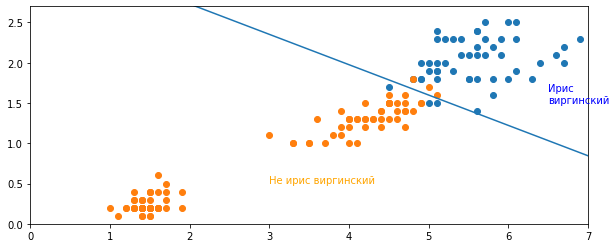

In [35]:
# Линейное разделение классов
plt.figure(figsize=(10, 4))
plt.scatter(X[(y == 1).flatten(), 0], X[(y == 1).flatten(), 1])
plt.scatter(X[(y == 0).flatten(), 0], X[(y == 0).flatten(), 1])
plt.text(6.5, 1.5, "Ирис\nвиргинский", color='blue')
plt.text(3, 0.5, "Не ирис виргинский", color='orange')
x = np.array([1, 7])
y_plot = - (theta[1,0] * x + theta[0,0]) / theta[2,0]
plt.plot(x, y_plot)
plt.axis([0, 7, 0, 2.7])

# Многопеременная логистическая регрессия  
Когда предсказываем единственное значение, но число классов больше 2

In [36]:
X = iris.data[:, 2:]
X_b = np.c_[np.ones((150, 1)), X]
y = iris.target
X_b.shape, y.shape

((150, 3), (150,))

In [37]:
weights = np.random.randn(3, 3) # Веса для каждого класса одинаково
weights

array([[-0.22346279,  0.71400049,  0.47323762],
       [-0.07282891, -0.84679372, -1.51484722],
       [-0.44651495,  0.85639879,  0.21409374]])

In [38]:
def softmax(s): # функция softmax - возвращает вероятность принадлежности объекта относительно каждого класса
    return np.exp(s) / np.sum(np.exp(s), axis=1, keepdims=True)

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
one_hot = OneHotEncoder(sparse=False).fit(y.reshape((-1, 1))) # условие для softmax, чтобы таргеты были представлены бинарными последовательностями
one_hot.categories_

[array([0, 1, 2])]

In [41]:
y_one_hot = one_hot.transform(y.reshape((-1, 1)))

In [42]:
epochs = 30000
eta = 0.1
for epoch in range(epochs):
    s = X_b.dot(weights) # вычисляем взвешенную сумму
    p = softmax(s) # вычисляем вероятности каждого класса softmax
    error = np.sum(np.sum(y_one_hot * np.log(p), axis=1, keepdims=True)) / -150 # Кросс-энтропия
    print(f"{epoch}: CROSS ENTROPY - {error}")
    grad = X_b.T.dot(p - y_one_hot) / 150
    weights -= eta * grad



Выходные данные были обрезаны до нескольких последних строк (5000).
25000: CROSS ENTROPY - 0.09326297616650389
25001: CROSS ENTROPY - 0.09326203047661111
25002: CROSS ENTROPY - 0.09326108485149256
25003: CROSS ENTROPY - 0.09326013929114146
25004: CROSS ENTROPY - 0.093259193795551
25005: CROSS ENTROPY - 0.09325824836471446
25006: CROSS ENTROPY - 0.09325730299862485
25007: CROSS ENTROPY - 0.09325635769727555
25008: CROSS ENTROPY - 0.09325541246065965
25009: CROSS ENTROPY - 0.09325446728877035
25010: CROSS ENTROPY - 0.09325352218160089
25011: CROSS ENTROPY - 0.09325257713914445
25012: CROSS ENTROPY - 0.09325163216139423
25013: CROSS ENTROPY - 0.09325068724834339
25014: CROSS ENTROPY - 0.09324974239998524
25015: CROSS ENTROPY - 0.09324879761631287
25016: CROSS ENTROPY - 0.09324785289731953
25017: CROSS ENTROPY - 0.09324690824299846
25018: CROSS ENTROPY - 0.09324596365334277
25019: CROSS ENTROPY - 0.09324501912834575
25020: CROSS ENTROPY - 0.09324407466800055
25021: CROSS ENTROPY - 0.093243

Text(0.5, 1.25, 'Ирис щетинистый')

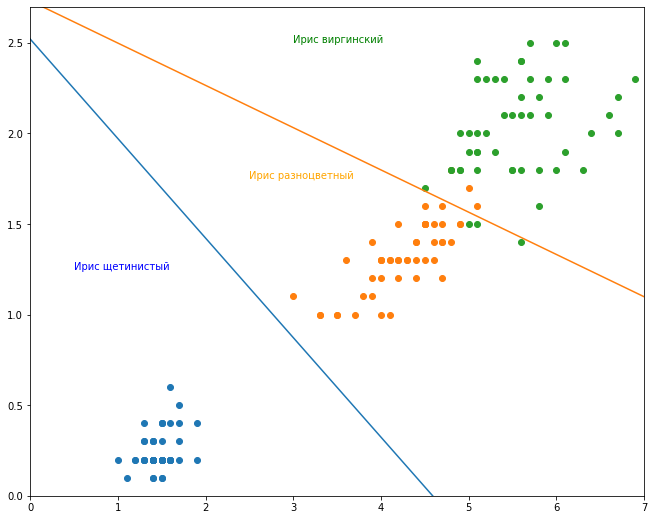

In [45]:
# X[:, 1] - длина лепестков
# X[:, 2] - ширина лепестков
plt.figure(figsize=(11, 9))
plt.scatter(X[(y==0).flatten(), 0], X[(y==0).flatten(), 1])
plt.scatter(X[(y==1).flatten(), 0], X[(y==1).flatten(), 1])
plt.scatter(X[(y==2).flatten(), 0], X[(y==2).flatten(), 1])
x = np.array([-3, 9])
y_plot = - (weights[1,0] * x + weights[0,0]) / weights[2,0]
plt.plot(x, y_plot)
y_plot = - (weights[1,2] * x + weights[0,2]) / weights[2,2]
plt.plot(x, y_plot)
plt.axis([0, 7, 0, 2.7])
plt.text(3, 2.5, "Ирис виргинский", color='green')
plt.text(2.5, 1.75, "Ирис разноцветный", color='orange')
plt.text(0.5, 1.25, "Ирис щетинистый", color='blue')